<a id = "top"></a> [ML Models](#ml_models) 
# Applying ML Classification On Iris Dataset 
to predict the Species for any given value of SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading 'iris' dataset at the same time excluding the column at '0' index

In [3]:
iris_data = pd.read_csv("./csv/Iris.csv", usecols=[1,2,3,4,5])
print(iris_data.head())
print(iris_data['Species'].unique())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Alternative way of loading 'iris' dataset using 'sklearn'

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()

# np.c_ is the numpy concatenate function which is used to concat iris['data'] and iris['target'] arrays 

data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Inspecting dataset for null values

In [5]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Preprocessing - Changing Categorical values in 'Species' to numerical values

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
iris_data['Species'] = encoder.fit_transform(iris_data['Species'])

### Inspecting the changed dataset

In [7]:
categories = iris_data['Species'].unique()
for cat in categories:
    temp = iris_data[iris_data['Species'] == cat]
    print(cat,temp['Species'].count())

0 50
1 50
2 50


## Feature and Target selection
SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm are the features 

Species is the target

In [8]:
features = iris_data.iloc[:,:-1]
X = iris_data.iloc[:,:-1].values
y = iris_data.iloc[:,-1].values

## Plotting correlation

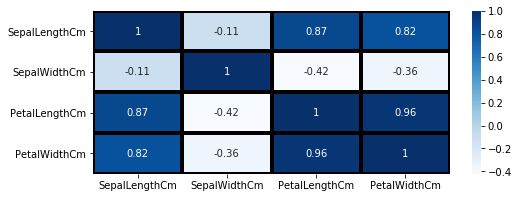

In [10]:
plt.figure(figsize = (8,3))
sns.heatmap(features.corr(),cmap='Blues',annot=True,linewidths=3, linecolor='black')

### Alternate display (select any one)

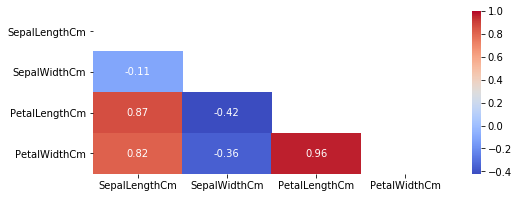

In [11]:
plt.figure(figsize = (8,3))
matrix = np.triu(features.corr())
sns.heatmap(features.corr(),cmap = 'coolwarm', annot=True, mask = matrix)

It can be inferred from the correlation matrix that 'PetalWidthCm' and 'PetalLengthCm' have a strong positive correlation of 0.96

### PCA(Principal Component Analysis)
used for feature reduction ie exctracting the the most relevant features from the given features

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
# print(X_r)

In [14]:
import numpy as np
c1 = np.array([row for row,index in zip(X_r, y) if index==0])
c2 = np.array([row for row,index in zip(X_r, y) if index==1])
c3 = np.array([row for row,index in zip(X_r, y) if index==2])

### Plotting the 3 target categories to see if there is a hyper plane that seperates the 3 from each other

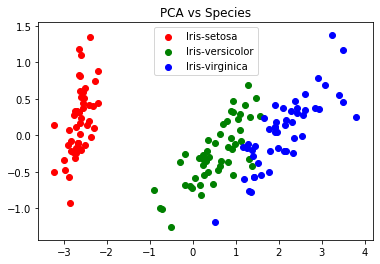

In [15]:
plt.scatter(c1[:,0],c1[:,1],color='red', label = "Iris-setosa")
plt.scatter(c2[:,0],c2[:,1],color='green', label = "Iris-versicolor")
plt.scatter(c3[:,0],c3[:,1],color='blue', label = "Iris-virginica")
plt.legend(loc="upper center")
plt.title("PCA vs Species")
plt.show()

### Splitting the dataset for training and testing

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

<a id="ml_models"></a>
## Applying diffirent ML model to classify and predict the target

#### 1. SVM
#### 2. LogisticRegression
#### 3. k-Nearest Neighbors Classifier
#### 4. GaussianNB 
#### 5. Random Forest
#### 6. XGBoost
#### 7. DecisionTreeClassifier
#### 8. Ensembled Classifier
#### 9. ExtraTreesClassifier
#### 10. VotingClassifier

### 

### 1. SVM

In [17]:
from sklearn import svm
svm_model = svm.SVC(C=1.0,kernel='rbf')
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

### 2.  LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

### 3. k-Nearest Neighbors Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

### 4. GaussianNB

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
y_pred = gnb_model.predict(x_test)

### 5. Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rnn_model = RandomForestClassifier(n_estimators=200)
rnn_model.fit(x_train, y_train)
y_pred = rnn_model.predict(x_test)

### 6. XGBoost

In [22]:
!pip install xgboost

In [23]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

### 7. DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

### 8. Ensembled Classifier

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging_model = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)
bagging_model.fit(x_train, y_train)
y_pred = bagging_model.predict(x_test)

### 9. ExtraTreesClassifier

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
et_model = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
et_model.fit(x_train, y_train)
y_pred = et_model.predict(x_test)

### 10. VotingClassifier

In [27]:
from sklearn.ensemble import VotingClassifier

### Comparing Actual and Predicted Value

In [28]:
models = [svm_model, lr_model, knn_model, gnb_model, rnn_model, xgb_model, dt_model, bagging_model, et_model]
model_names = ["SVM", "LogisticRegression", "k-Nearest Neighbors Classifier", "GaussianNB", "Random Forest", "XGBoost", "DecisionTreeClassifier", "Ensembled Classifier", "ExtraTreesClassifier"]
for model,model_name in zip(models,model_names):
    df = pd.DataFrame({'Actual': y_test, 'Predicted': model.predict(x_test)})  
    print(f"{model_name}\n{df.head()}\n")

SVM
   Actual  Predicted
0       2          2
1       0          0
2       2          2
3       2          2
4       2          2

LogisticRegression
   Actual  Predicted
0       2          2
1       0          0
2       2          2
3       2          2
4       2          2

k-Nearest Neighbors Classifier
   Actual  Predicted
0       2          2
1       0          0
2       2          2
3       2          2
4       2          2

GaussianNB
   Actual  Predicted
0       2          2
1       0          0
2       2          2
3       2          2
4       2          2

Random Forest
   Actual  Predicted
0       2          2
1       0          0
2       2          2
3       2          2
4       2          2

XGBoost
   Actual  Predicted
0       2          2
1       0          0
2       2          2
3       2          2
4       2          2

DecisionTreeClassifier
   Actual  Predicted
0       2          2
1       0          0
2       2          2
3       2          2
4       2          2

E

<a id="model_accuracy"></a> [Custom Model](#custom_model)
## Accuracy Score

In [29]:
from sklearn.metrics import accuracy_score

models = [svm_model, lr_model, knn_model, gnb_model, rnn_model, xgb_model, dt_model, bagging_model, et_model]
model_names = ["SVM", "LogisticRegression", "k-Nearest Neighbors Classifier", "GaussianNB", "Random Forest", "XGBoost", "DecisionTreeClassifier", "Ensembled Classifier", "ExtraTreesClassifier"]
for model,model_name in zip(models,model_names):
    score = accuracy_score(y_test, model.predict(x_test))
    print(f"{model_name} Accuracy Score = {round(score,4)}")


SVM Accuracy Score = 0.9778
LogisticRegression Accuracy Score = 0.9778
k-Nearest Neighbors Classifier Accuracy Score = 0.9778
GaussianNB Accuracy Score = 0.9778
Random Forest Accuracy Score = 0.9778
XGBoost Accuracy Score = 0.9778
DecisionTreeClassifier Accuracy Score = 0.9778
Ensembled Classifier Accuracy Score = 0.9778
ExtraTreesClassifier Accuracy Score = 0.9778


## Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix

models = [svm_model, lr_model, knn_model, gnb_model, rnn_model, xgb_model, dt_model, bagging_model, et_model]
model_names = ["SVM", "LogisticRegression", "k-Nearest Neighbors Classifier", "GaussianNB", "Random Forest", "XGBoost", "DecisionTreeClassifier", "Ensembled Classifier", "ExtraTreesClassifier"]
for model,model_name in zip(models,model_names):
    matrix = confusion_matrix(y_test, model.predict(x_test))
    print(f"{model_name} \n**Confusion Matrix**\n{matrix}\n")


SVM 
**Confusion Matrix**
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]

LogisticRegression 
**Confusion Matrix**
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]

k-Nearest Neighbors Classifier 
**Confusion Matrix**
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]

GaussianNB 
**Confusion Matrix**
[[21  0  0]
 [ 0 10  0]
 [ 0  1 13]]

Random Forest 
**Confusion Matrix**
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]

XGBoost 
**Confusion Matrix**
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]

DecisionTreeClassifier 
**Confusion Matrix**
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]

Ensembled Classifier 
**Confusion Matrix**
[[21  0  0]
 [ 0 10  0]
 [ 0  1 13]]

ExtraTreesClassifier 
**Confusion Matrix**
[[21  0  0]
 [ 0 10  0]
 [ 0  1 13]]



## Classification Report

In [31]:
from sklearn.metrics import classification_report

models = [svm_model, lr_model, knn_model, gnb_model, rnn_model, xgb_model, dt_model, bagging_model, et_model]
model_names = ["SVM", "LogisticRegression", "k-Nearest Neighbors Classifier", "GaussianNB", "Random Forest", "XGBoost", "DecisionTreeClassifier", "Ensembled Classifier", "ExtraTreesClassifier"]
for model,model_name in zip(models,model_names):
    c_report = classification_report(y_test, model.predict(x_test))
    print(f"{model_name} \nclassification_report\n{c_report}\n")

SVM 
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


LogisticRegression 
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


k-Nearest Neighbors Classifier 
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
    

<a id="custom_model"></a>
## Evaluating model for a custom input

In [32]:
x_test[0,:]

array([6.4, 2.8, 5.6, 2.1])

In [33]:
test_value = np.array([[7.5,3,6,2.5]])

models = [svm_model, lr_model, knn_model, gnb_model, rnn_model, xgb_model, dt_model, bagging_model, et_model]
model_names = ["SVM", "LogisticRegression", "k-Nearest Neighbors Classifier", "GaussianNB", "Random Forest", "XGBoost", "DecisionTreeClassifier", "Ensembled Classifier", "ExtraTreesClassifier"]

for model,model_name in zip(models,model_names):
    own_pred = model.predict(test_value)
    print(f"{model_name} Prediction = {own_pred}")
    

SVM Prediction = [2]
LogisticRegression Prediction = [2]
k-Nearest Neighbors Classifier Prediction = [2]
GaussianNB Prediction = [2]
Random Forest Prediction = [2]
XGBoost Prediction = [2]
DecisionTreeClassifier Prediction = [2]
Ensembled Classifier Prediction = [2]
ExtraTreesClassifier Prediction = [2]


##### Note
Prediction = [2] corresponds to "Iris-versicolor"

[ML Models](#ml_models) |  [Model Accuracy](#model_accuracy) |  [Page Top](#top)